In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import h5py
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
import os

In [3]:
from affogato.segmentation import compute_mws_segmentation

In [4]:
from defects_dlmbl.segment_affinities import mutex_watershed

In [5]:
os.chdir('/home/funkl/defects_DLMBL/')

# 2 affinities

In [6]:
affinities = imread('experiments/images/98000_affinity.tif')

In [7]:
affinities.shape

(2, 256, 256)

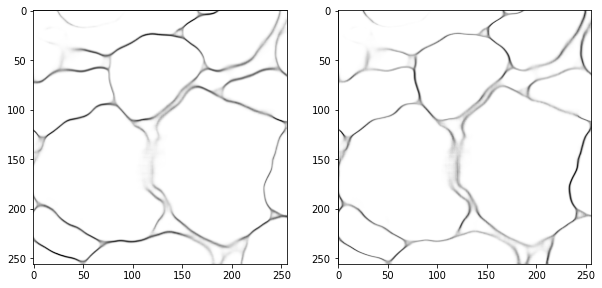

In [8]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
for af,ax in zip(affinities,axes.flatten()):
    ax.imshow(af,cmap='gray')

In [9]:
offsets = [[-1, 0], [0, -1]]

In [10]:
offsets

[[-1, 0], [0, -1]]

In [11]:
affinities.shape

(2, 256, 256)

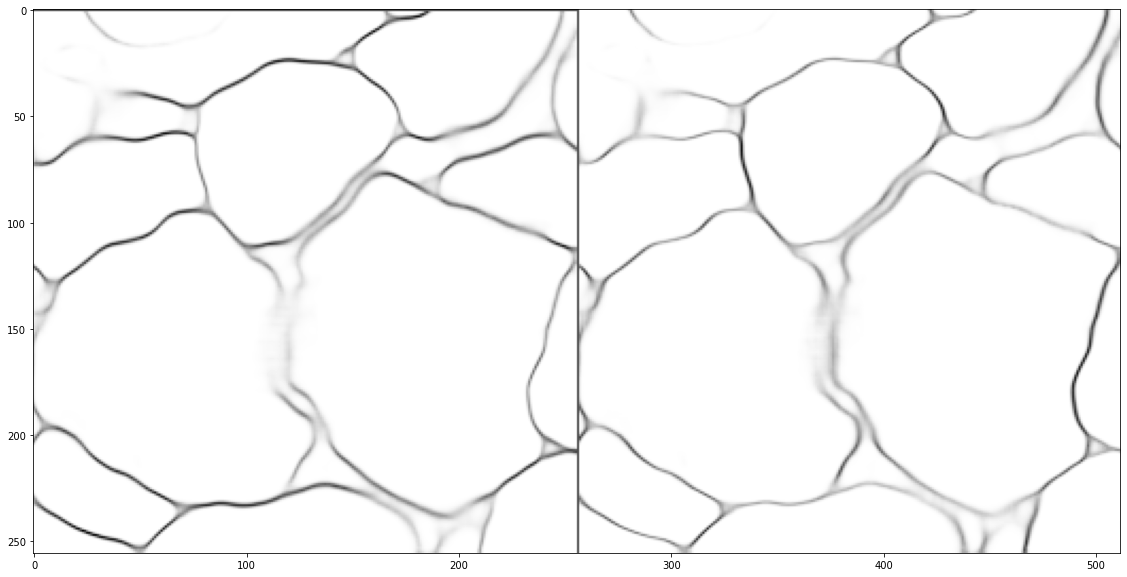

In [13]:
attractive_repuslive_weights = affinities.copy()

seperating_channel = 2
# attractive_repuslive_weights[:seperating_channel] *= -1
# attractive_repuslive_weights[:seperating_channel] += +1
# attractive

fig = plt.figure(figsize=(30,10))
plt.imshow(np.concatenate(tuple(attractive_repuslive_weights[c] 
                                for c in range(len(attractive_repuslive_weights))), axis=1), cmap='gray')

In [14]:
attractive_repuslive_weights.mean(axis=(-1,-2))

array([0.97700727, 0.98012257], dtype=float32)

In [15]:
seg = compute_mws_segmentation(attractive_repuslive_weights, 
                               offsets, seperating_channel, strides=None) # strides needed for tiling

In [16]:
np.unique(seg)

array([1], dtype=uint64)

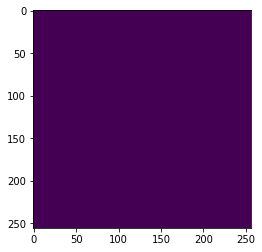

In [17]:
plt.imshow(seg)

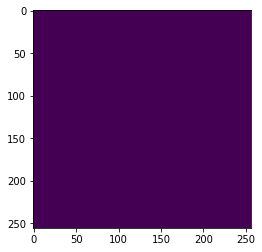

In [19]:
plt.imshow(mutex_watershed(affinities,offsets))

# ISBI data

In [5]:
from defects_dlmbl.datasets import ISBIDataset

In [6]:
isbi = ISBIDataset('data/isbi/isbi_train_volume.h5')

In [7]:
arr_x=[]
arr_y=[]
for index in range(len(isbi)):
    x,y = isbi[index]
    arr_x.append(x.numpy())
    arr_y.append(y.numpy())
x = np.array(arr_x)
y = np.array(arr_y)

In [8]:
x.shape,y.shape

((30, 1, 512, 512), (30, 17, 512, 512))

In [9]:
offsets = [[-1, 0, 0], [0, -1, 0], [0, 0, -1],
           # direct 3d nhood for attractive edges
           [-1, -1, -1], [-1, 1, 1], [-1, -1, 1], [-1, 1, -1],
           # indirect 3d nhood for dam edges
           [0, -9, 0], [0, 0, -9],
           # long range direct hood
           [0, -9, -9], [0, 9, -9], [0, -9, -4], [0, -4, -9], [0, 4, -9], [0, 9, -4],
           # inplane diagonal dam edges
           [0, -27, 0], [0, 0, -27]]

In [10]:
y.shape

(30, 17, 512, 512)

In [11]:
y.min(axis=(-1,-2))

array([[1.57919705e-01, 0.00000000e+00, 0.00000000e+00, 1.48586750e-01,
        1.48698881e-01, 1.51360929e-01, 1.53196394e-01, 5.04673453e-15,
        8.39161629e-16, 9.23245248e-12, 1.15644108e-08, 6.03988498e-14,
        3.99756644e-13, 6.58924564e-12, 1.56293934e-12, 1.91783852e-18,
        9.48115762e-19],
       [1.27602279e-01, 0.00000000e+00, 0.00000000e+00, 1.23074390e-01,
        1.16352275e-01, 1.21207893e-01, 1.21977717e-01, 2.23064454e-15,
        1.22050873e-15, 6.58384632e-12, 1.10014913e-08, 1.42645140e-12,
        6.65527800e-13, 2.48156964e-12, 1.27870490e-12, 6.55332475e-18,
        2.22670176e-18],
       [1.06885612e-01, 0.00000000e+00, 0.00000000e+00, 1.00233994e-01,
        1.02345541e-01, 1.02965653e-01, 1.02553725e-01, 2.93086555e-16,
        1.77333113e-15, 1.41023703e-11, 6.37002229e-10, 1.22468409e-12,
        2.43525165e-12, 1.07741908e-12, 1.67750883e-12, 1.31814424e-17,
        1.66393326e-18],
       [9.20201838e-02, 0.00000000e+00, 0.00000000e+00, 8.754

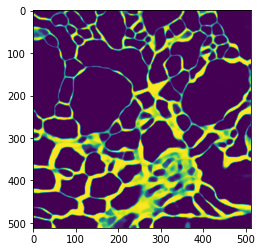

In [12]:
plt.imshow(y[0,0])

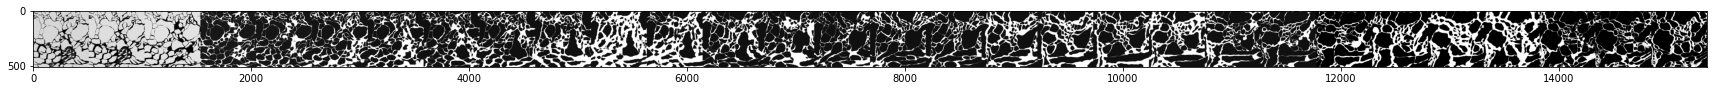

In [13]:
attractive_repuslive_weights = y.copy()

seperating_channel = 3
attractive_repuslive_weights[:seperating_channel] *= -1
attractive_repuslive_weights[:seperating_channel] += +1
# attractive

fig = plt.figure(figsize=(30,10))
plt.imshow(np.concatenate(tuple(attractive_repuslive_weights[c,4] 
                                for c in range(len(attractive_repuslive_weights))), axis=1), cmap='gray')

In [14]:
attractive_repuslive_weights.mean(axis=(-1,-2))

array([[0.6524966 , 0.9633716 , 0.96592367, 0.6430739 , 0.65861773,
        0.6491974 , 0.6522657 , 0.78243417, 0.80444264, 0.70952356,
        0.7211908 , 0.7644761 , 0.77885765, 0.7860909 , 0.7715939 ,
        0.45177183, 0.50183344],
       [0.6743176 , 0.9628232 , 0.96670306, 0.68040913, 0.6647694 ,
        0.673673  , 0.67117083, 0.78037614, 0.81025624, 0.7090945 ,
        0.72251314, 0.76262915, 0.7810823 , 0.7917797 , 0.76925784,
        0.4467163 , 0.5108322 ],
       [0.67983603, 0.96173924, 0.9655016 , 0.67751414, 0.678772  ,
        0.6845726 , 0.6715618 , 0.7748838 , 0.8024589 , 0.7004375 ,
        0.71316844, 0.7546134 , 0.77511454, 0.7833992 , 0.7628706 ,
        0.43997177, 0.49540263],
       [0.2725665 , 0.03870719, 0.03470092, 0.27884066, 0.27134326,
        0.2745035 , 0.27539876, 0.22472702, 0.19915448, 0.30670124,
        0.28396532, 0.24838968, 0.22947836, 0.21563691, 0.23680188,
        0.5719947 , 0.50965   ],
       [0.28124526, 0.03861488, 0.03639475, 0.281243

In [15]:
attractive_repuslive_weights.shape

(30, 17, 512, 512)

In [16]:
offsets

[[-1, 0, 0],
 [0, -1, 0],
 [0, 0, -1],
 [-1, -1, -1],
 [-1, 1, 1],
 [-1, -1, 1],
 [-1, 1, -1],
 [0, -9, 0],
 [0, 0, -9],
 [0, -9, -9],
 [0, 9, -9],
 [0, -9, -4],
 [0, -4, -9],
 [0, 4, -9],
 [0, 9, -4],
 [0, -27, 0],
 [0, 0, -27]]

In [ ]:
seg = compute_mws_segmentation(attractive_repuslive_weights, 
                               offsets, seperating_channel, strides=[1,10,10]) # strides needed for tiling? or just reduce runtime?

In [ ]:
seg.shape